In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pylab as plt
from matplotlib import cm
import numpy as np
from wordcloud import WordCloud
import json

In [2]:
data = pd.read_csv("processed_data.csv")
data.head()

,Timestamp,in_state_out_of_state,quarterly_fee_types,quarterly_fee_amount,student_contribution,state_contribution,medical_centers
0,2016/05/10 3:36:47 PM MDT,"$20,000 – 29,999","Activity Fee,","$900 – 1,000",50 – 60%,30 – 34%,30 – 39%
1,2016/05/10 3:58:55 PM MDT,"$30,000 – 40,000","AS Activity Fee, College Activity Fee, ICA Fee...","$900 – 1,000",45 – 49%,50 – 54%,30 – 39%
2,2016/05/10 4:02:46 PM MDT,"$20,000 – 29,999","Gym, Caps, student orgs, student body, transpo...",$600 – 699,45 – 49%,50 – 54%,10 – 19%
3,2016/05/10 4:14:00 PM MDT,"$30,000 – 40,000",None,$500 – 599,50 – 60%,35 – 39%,10 – 19%
4,2016/05/10 4:18:29 PM MDT,"$10,000 – 19,999",None,$500 – 599,50 – 60%,30 – 34%,50 – 60%


In [3]:
data.columns.values

array(['Timestamp', 'in_state_out_of_state', 'quarterly_fee_types',
       'quarterly_fee_amount', 'student_contribution',
       'state_contribution', 'medical_centers'], dtype=object)

In [4]:
#Creatinga new dict object to dump data into it. This is for consumption by the google charts
new_json = {}

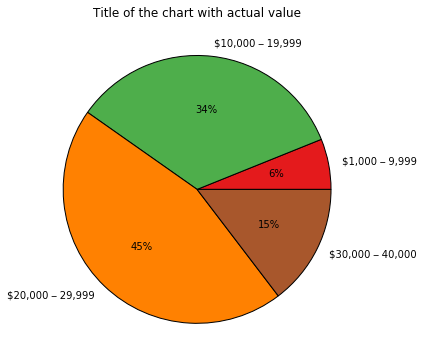

In [5]:
#get data
in_state_out_of_state = data["in_state_out_of_state"].value_counts().sort_index(axis=0)
in_state_out_of_state_list = in_state_out_of_state.tolist()
in_state_out_of_state_labels = [x.decode('UTF8') for x in in_state_out_of_state.index]
in_state_out_of_state_list_length = len(in_state_out_of_state_list)

#plot
plt.figure(1, figsize=(6, 6))
colors = cs=cm.Set1(np.arange(in_state_out_of_state_list_length)/(in_state_out_of_state_list_length * 1.0))
plt.pie(in_state_out_of_state_list, labels = in_state_out_of_state_labels, autopct='%.0f%%', colors = colors)
#plt.pie(in_state_out_of_state_list, labels = in_state_out_of_state_labels, autopct='%.0f%%')

plt.title("Title of the chart with actual value")

new_json["in_state_out_of_state"] = {"labels": in_state_out_of_state_labels, "values": in_state_out_of_state_list}

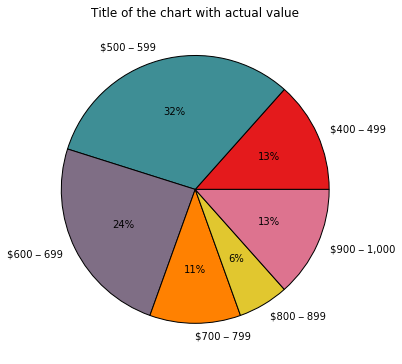

In [6]:
#get data
quarterly_fee_amount = data["quarterly_fee_amount"].value_counts().sort_index(axis=0)
quarterly_fee_amount_list = quarterly_fee_amount.tolist()
quarterly_fee_amount_labels = [x.decode('UTF8') for x in quarterly_fee_amount.index]
quarterly_fee_amount_list_length = len(quarterly_fee_amount_list)

#plot
plt.figure(2, figsize=(6, 6))
colors = cs=cm.Set1(np.arange(quarterly_fee_amount_list_length)/(quarterly_fee_amount_list_length * 1.0))
plt.pie(quarterly_fee_amount_list, labels = quarterly_fee_amount_labels, autopct='%.0f%%', colors = colors)
#plt.pie(quarterly_fee_amount_list, labels = quarterly_fee_amount_labels, autopct='%.0f%%')

plt.title("Title of the chart with actual value")
new_json["quarterly_fee_amount"] = {"labels": quarterly_fee_amount_labels, "values": quarterly_fee_amount_list}

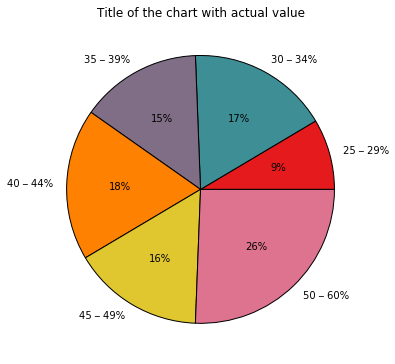

In [7]:
#get data
student_contribution = data["student_contribution"].value_counts().sort_index(axis=0)
student_contribution_list = student_contribution.tolist()
student_contribution_labels = [x.decode('UTF8') for x in student_contribution.index]
student_contribution_list_length = len(student_contribution_list)

#plot
plt.figure(3, figsize=(6, 6))
colors = cs=cm.Set1(np.arange(student_contribution_list_length)/(student_contribution_list_length * 1.0))
plt.pie(student_contribution_list, labels = student_contribution_labels, autopct='%.0f%%', colors = colors)
#plt.pie(student_contribution_list, labels = student_contribution_labels, autopct='%.0f%%')

plt.title("Title of the chart with actual value")
new_json["student_contribution"] = {"labels": student_contribution_labels, "values": student_contribution_list}

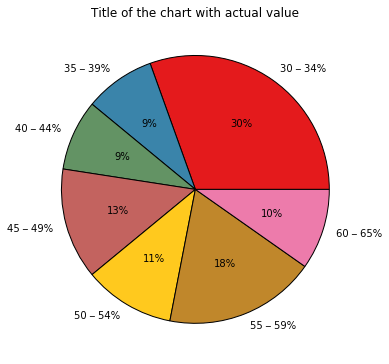

In [8]:
#get data
state_contribution = data["state_contribution"].value_counts().sort_index(axis=0)
state_contribution_list = state_contribution.tolist()
state_contribution_labels = [x.decode('UTF8') for x in state_contribution.index]
state_contribution_list_length = len(state_contribution_list)

#plot
plt.figure(4, figsize=(6, 6))
colors = cs=cm.Set1(np.arange(state_contribution_list_length)/(state_contribution_list_length * 1.0))
plt.pie(state_contribution_list, labels = state_contribution_labels, autopct='%.0f%%', colors = colors)
#plt.pie(state_contribution_list, labels = state_contribution_labels, autopct='%.0f%%')

plt.title("Title of the chart with actual value")
new_json["state_contribution"] = {"labels": state_contribution_labels, "values": state_contribution_list}

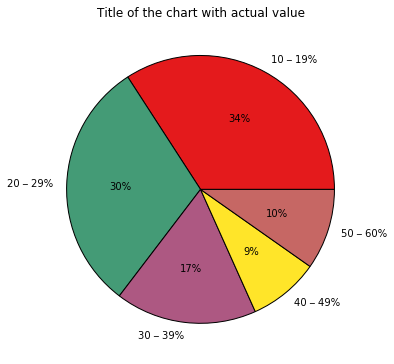

In [9]:
#get data
medical_centers = data["medical_centers"].value_counts().sort_index(axis=0)
medical_centers_list = medical_centers.tolist()
medical_centers_labels = [x.decode('UTF8') for x in medical_centers.index]
medical_centers_list_length = len(medical_centers_list)

#plot
plt.figure(4, figsize=(6, 6))
colors = cs=cm.Set1(np.arange(medical_centers_list_length)/(medical_centers_list_length * 1.0))
plt.pie(medical_centers_list, labels = medical_centers_labels, autopct='%.0f%%', colors = colors)
#plt.pie(medical_centers_list, labels = medical_centers_labels, autopct='%.0f%%')

plt.title("Title of the chart with actual value")
new_json["medical_centers"] = {"labels": medical_centers_labels, "values": medical_centers_list}

In [10]:
filter_list = ["none", "student", "activity", "service", "college", "public", "specific", "random", "sorry", "campus"]
def process_text(text_list):
    '''
    Process the given text to remove filtered words and to do stemming
    '''
    result = []
    print len(text_list)
    for word in text_list:
        word = word.lower()
        new_word = word.replace("fee", "")
        new_word = new_word.replace("activities", "activity")
        new_words = new_word.split(",")
        new_words = " ".join(new_words).split(" ")
        for word in filter_list:
            if word in new_words:
                new_words.remove(word)
        result = result + new_words
    print len(result)
    return result

82
422
['as', 'activity', 'ica', 'ucen', 'gym', 'caps', 'orgs', 'student', 'body', 'transportation', 'ship', 'rimac/gym', 'bus', 'sticker', 'tuition', 'gym', 'bus', 'gym', 'bus', 'stickers', 'as', 'funding', 's', 'as', 'housing/dining', '(if', 'applicable)', 'base', 'tuition', 'event', 'stuff', 'rec', 'ucen', 'recreation', 'center', 's', 'stundet', 's', 'library', 's', 'recreation', 'athletics', 'residential', 'life', 'recreation', 'housing', 'bus', 'health', 'insurance', '(if', 'applicable)', 'housing', 'tuition', 'upass', 's', 'student', 's', 'housing', 'books', 'tuition', 'parking', 'health', 's', 'center', 'a', 'work', 'thing', 'facilities', 'colleg', 'transit', 'tuition', 'housing', 'transportation', 'health', 'cleaning', 'as', 'transportation', 'recreation', 'rimac/gym', 's', 'recreation', 'transportation', 'probably', 'some', 'sort', 'of', 'administrative', 'housing', 'finances', 'such', 'as', 'those', 'that', 'go', 'towards', 'as', 'funding', 'gym', 'events', 'sports', 'health'

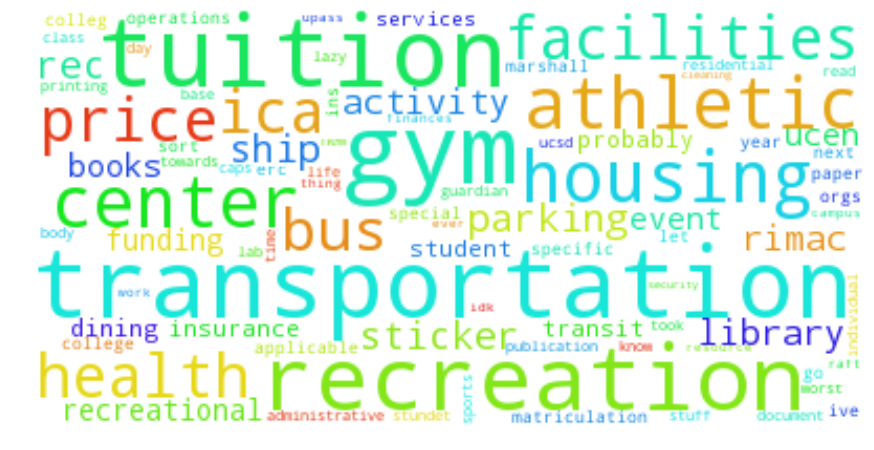

In [11]:
text_list = data["quarterly_fee_types"].tolist()
filtered_text_list = process_text(text_list)
filtered_text_list = filter(None, filtered_text_list)

wordcloud = WordCloud(background_color="white", max_words=5000, min_font_size=5, random_state=5)
wordcloud.generate(' '.join(filtered_text_list))
print filtered_text_list
plt.clf()
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud/latest.png")

In [12]:
#Create output JSON. Append header Amount and Count
output_json = {}
for key in new_json:
    combined_list = []
    combined_list.append(["Amount", "Count"])
    labels = new_json[key]["labels"]
    values = new_json[key]["values"]
    for i in range(len(labels)):
        combined_list.append([labels[i], values[i]])
    output_json[key] = combined_list

In [13]:
#Dump JSON
output_json_file = open("output.json", "w")
json.dump(output_json, output_json_file)
output_json_file.close()

In [14]:
#Add JS variable name to the dumped JSON
output_json_file = open("output.json", "r+")
file_content = output_json_file.read()
output_json_file.seek(0, 0)
output_json_file.write("var dumped_data = " + file_content)
output_json_file.close()